In [1]:
import numpy as np 
import scipy
from scipy import signal
import pandas as pd 
import os
import glob
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv1D, MaxPool2D, GlobalMaxPool2D, Dropout,Flatten,AveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
import neptune
import neptunecontrib
from time import time
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sn

Previous Lecture: 
    solve regression problems using Dense Neural Networks
    
This Lecture:
    solve classification problems using Convolutional Neural Networks

### Classification 

+ regression: 
    - output is a prediction on a quantity which takes continuous values
+ Classification: 
    - output is a prediction on a class, i.e. discrete labels
        + binary classification
        + multi-class classification
            - single-label classification
            - multi-label classification    

### Convolutional Neural Network (CNN, ConvNet)

+ a class of artifical Neural Networks
+ widely used in various computer vision tasks*
+ learn hierarchy of features


*Computer vision in an essential, complex, wide-spread, and ever developing part of AI.
Computer vision tasks include:
- Image Classification
- Object detection (verify the presence of specific objects in an image)
- Neural Style Transfer


### Why CNNs?

Image of 1300 X 1300px --> Input on a layer of a FC (Dense) network with e.g. 1000 hidden units --> 

parameters (weights) to calculate : (1000,1300x1300) = 1.69E9 parameters   (x3 for a color image)

\textbf{Create some simple 3x3 filters and apply with a convolution operator on images }

#### Convulution Operation

In [8]:

hide_code_in_slideshow()
from IPython.display import IFrame
IFrame('anim_slides.pdf',width=1200,height=1200)

![SegmentLocal](anim_slides.gif "conv_gif")

#### Example with edges filters

In [2]:
filter_v=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])  # 3x3 vertical edges filter 
filter_h=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])  # 3x3 horizontal edges filter 
filter_v_3d=np.dstack([filter_v]*3)                 # 3x3x3 vertical edges filter 
filter_h_3d=np.dstack([filter_h]*3)                 # 3x3x3 horizontal edges filter 


Apply edge detector on gray scale image (nh x nw)

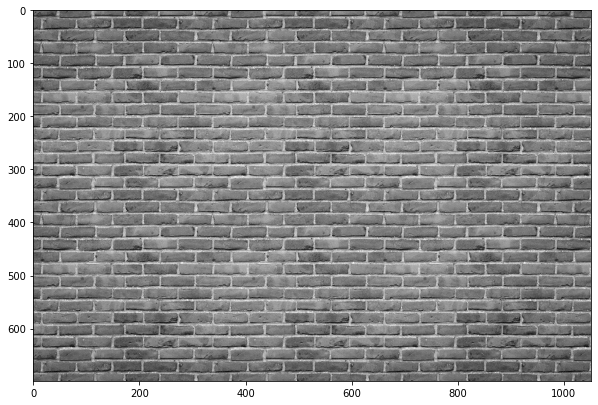

In [3]:
from PIL import Image
from numpy import asarray
image = Image.open('brick2.jpeg').convert('L')
brick = asarray(image)
plt.figure(figsize=(10,10))
plt.imshow(brick,cmap='gray')
plt.show()

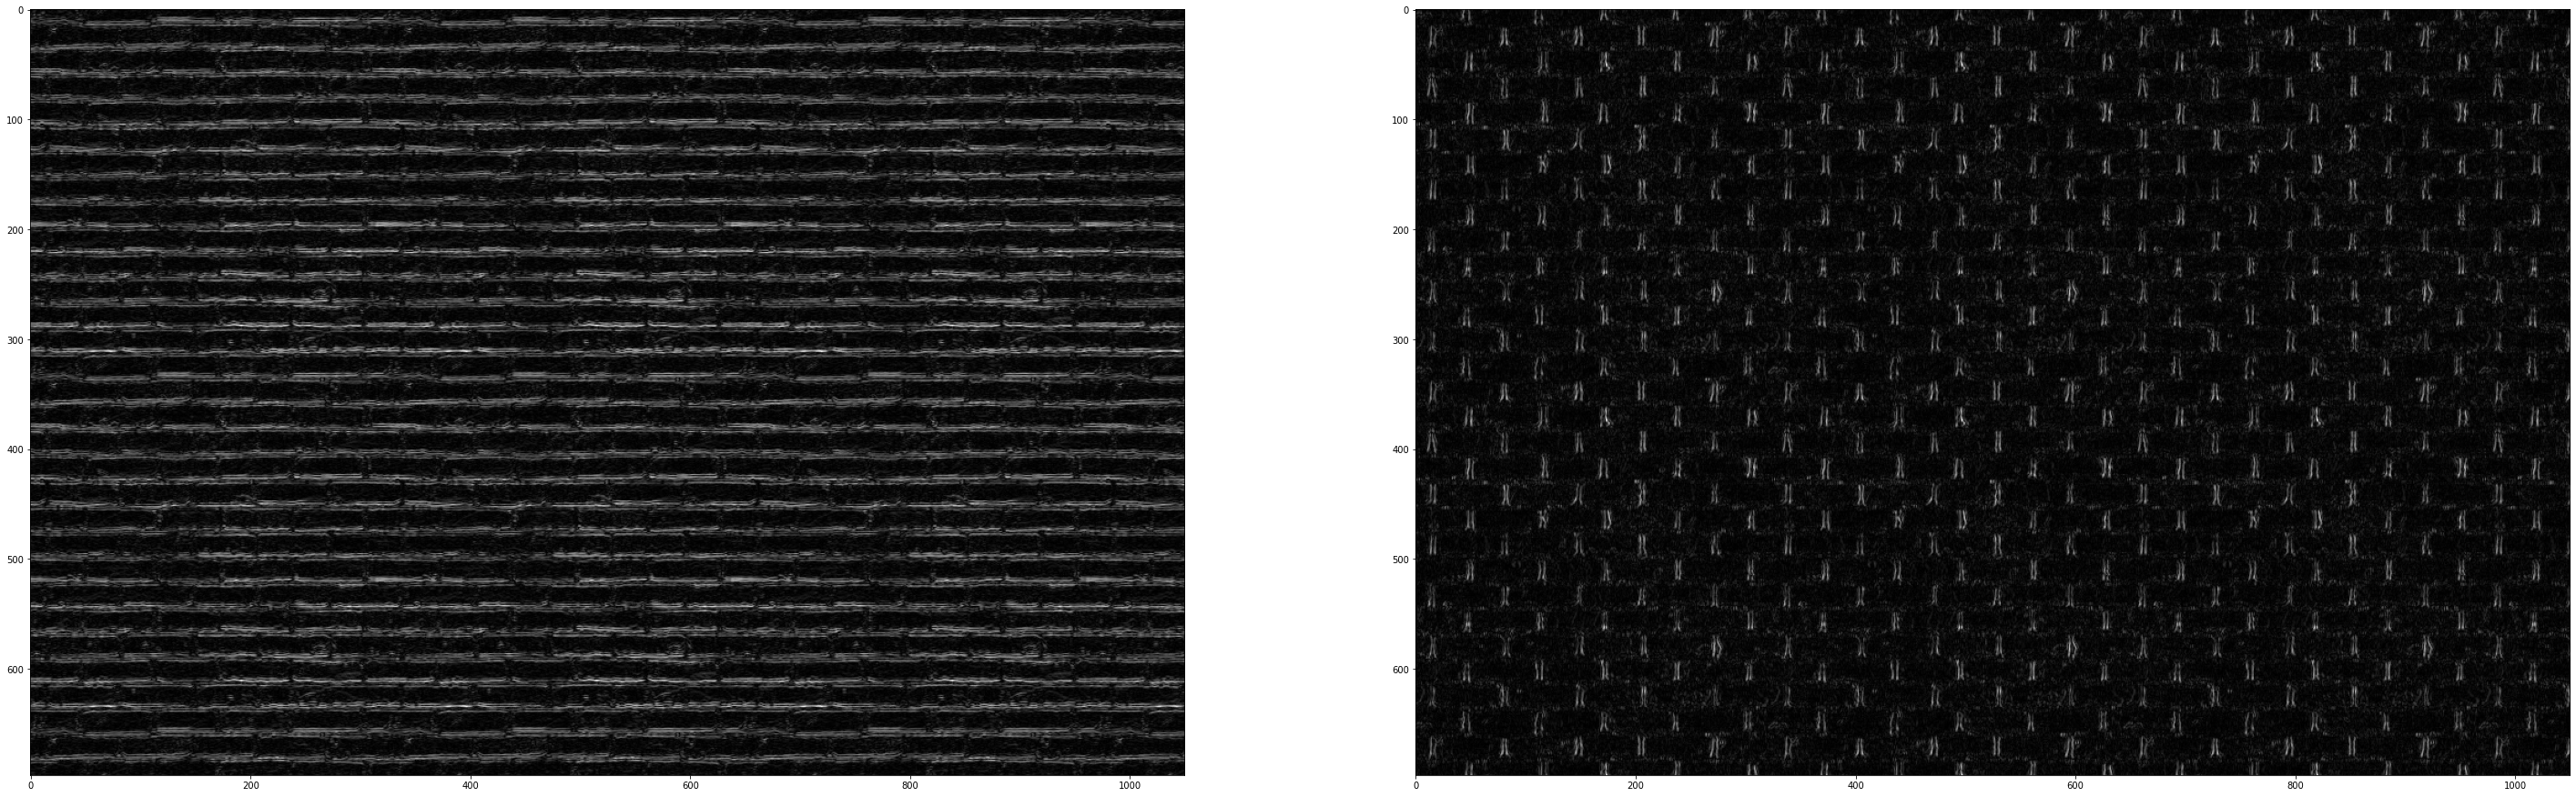

In [4]:
out_conv_h=signal.convolve2d(brick,filter_h,mode='valid')
out_conv_v=signal.convolve2d(brick,filter_v,mode='valid')

f, axarr = plt.subplots(1,2,figsize = (50,50))
axarr[0].imshow(np.absolute(out_conv_h),cmap='gray')
axarr[1].imshow(np.absolute(out_conv_v),cmap='gray')
plt.show()

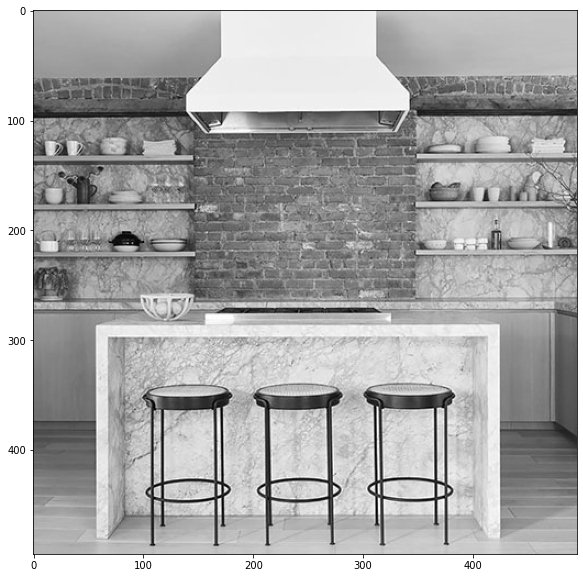

In [5]:
image = Image.open('brick.jpeg').convert('L')
brick = asarray(image)
plt.figure(figsize=(10,10))
plt.imshow(brick,cmap='gray')
plt.show()

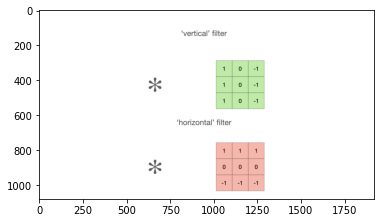

In [7]:
image = plt.imread('filters_conv.jpeg')
plt.imshow(image)
plt.show()

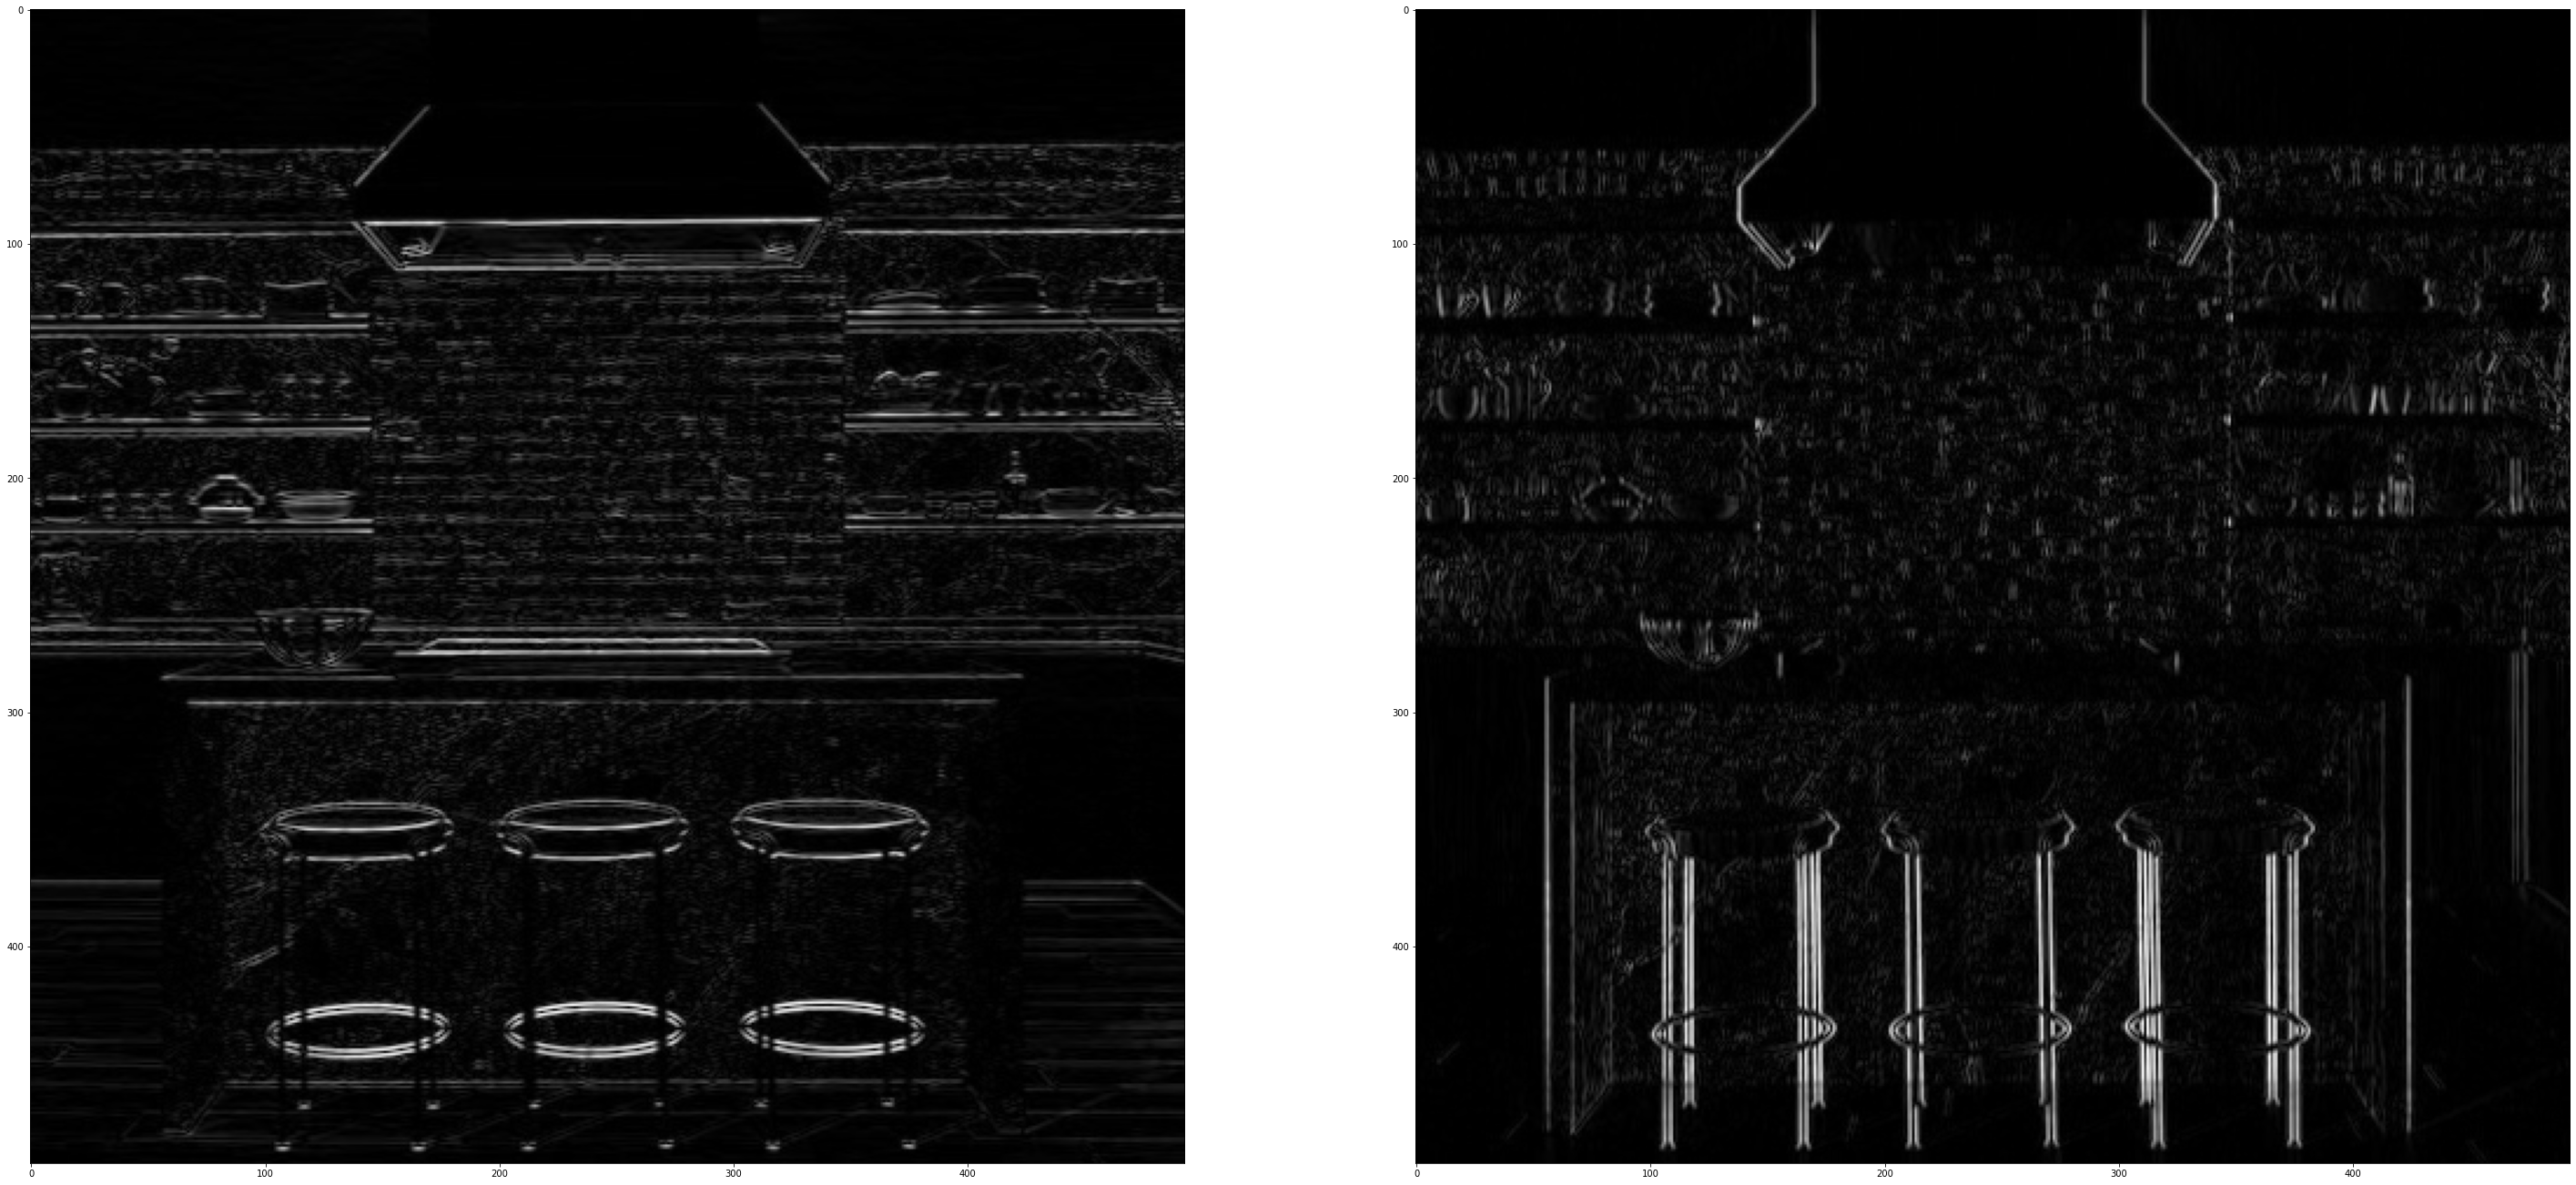

In [9]:
out_conv_v=signal.convolve2d(brick,filter_v,mode='valid')
out_conv_h=signal.convolve2d(brick,filter_h,mode='valid')

f, axarr = plt.subplots(1,2,figsize = (50,50))
axarr[0].imshow(np.absolute(out_conv_h),cmap='gray')
axarr[1].imshow(np.absolute(out_conv_v),cmap='gray')
plt.show()

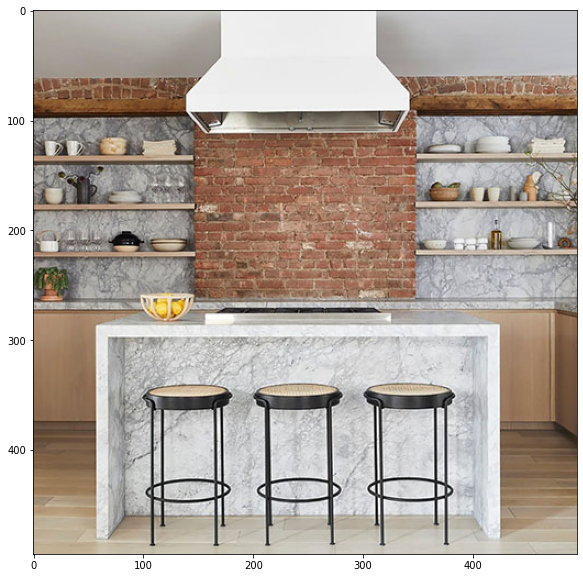

In [10]:
image = Image.open('brick.jpeg')
brick = asarray(image)
plt.figure(figsize=(10,10))
plt.imshow(brick)
plt.show()

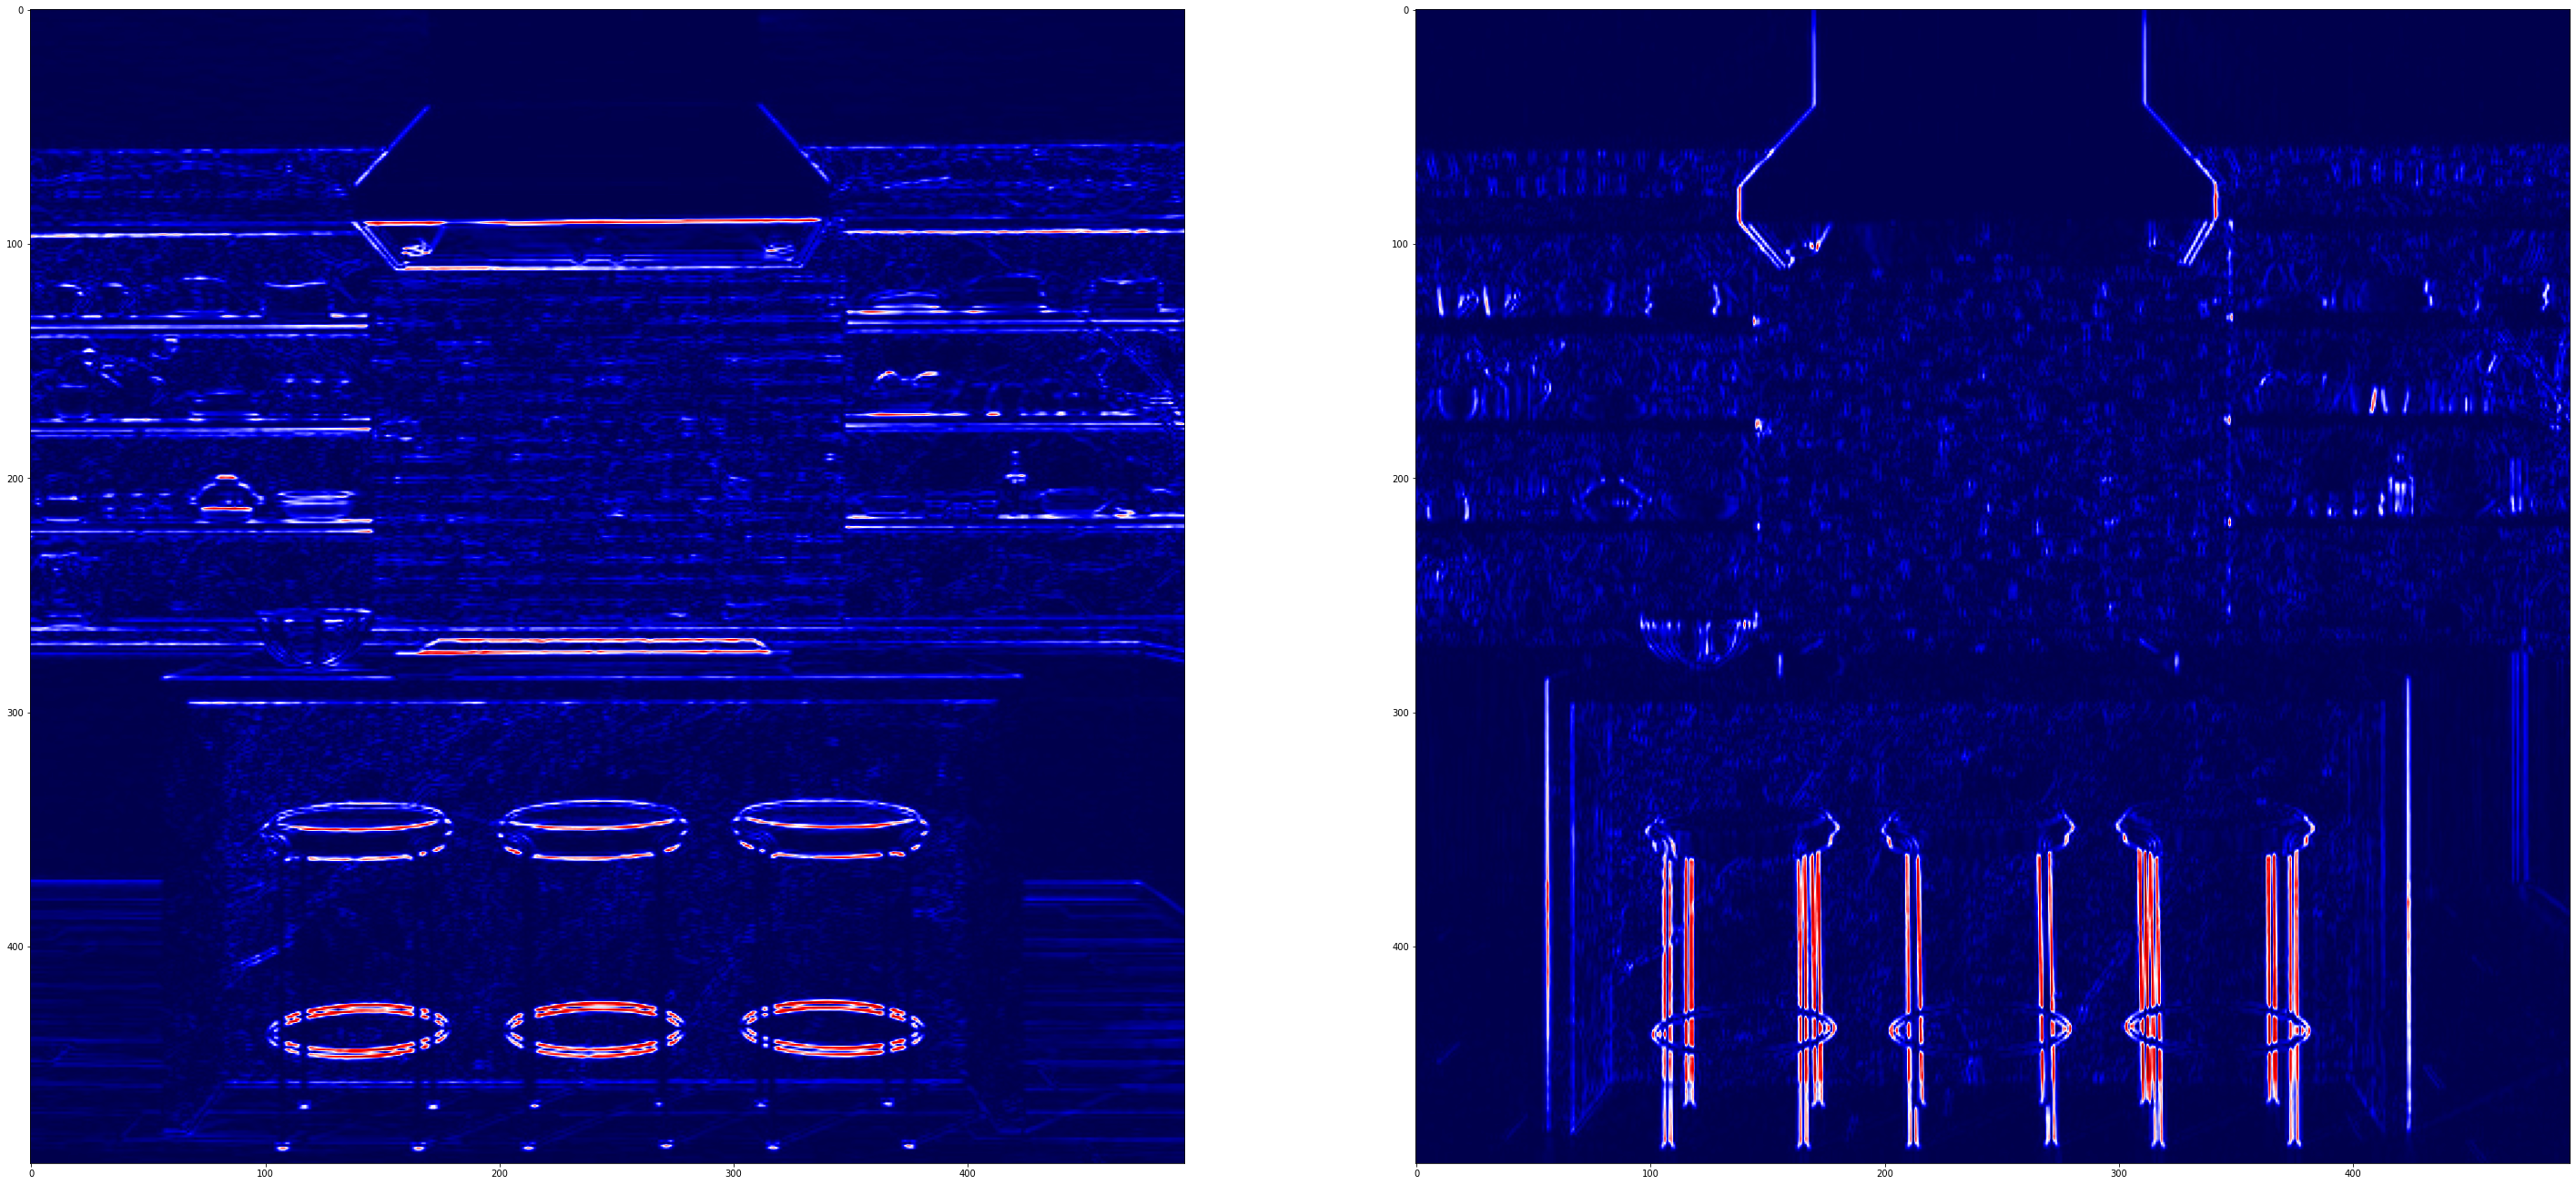

In [11]:
out_corr_v=signal.correlate(brick,filter_v_3d,mode='valid')
out_corr_h=signal.correlate(brick,filter_h_3d,mode='valid')

f, axarr = plt.subplots(1,2,figsize = (50,50))
axarr[0].imshow(np.absolute(out_corr_h),cmap='seismic')
axarr[1].imshow(np.absolute(out_corr_v),cmap='seismic')
plt.show()

In [9]:
import tabletext
data = [[1,0,-1],[1,0,-1],[1,0,-1]]
print(tabletext.to_text(data))

┌───┬───┬────┐
│ 1 │ 0 │ -1 │
├───┼───┼────┤
│ 1 │ 0 │ -1 │
├───┼───┼────┤
│ 1 │ 0 │ -1 │
└───┴───┴────┘


In [10]:

data = [[1,0,-1],[1,0,-1],[1,0,-1]]
print(tabletext.to_text(data))

┌───┬───┬────┐
│ 1 │ 0 │ -1 │
├───┼───┼────┤
│ 1 │ 0 │ -1 │
├───┼───┼────┤
│ 1 │ 0 │ -1 │
└───┴───┴────┘


In [11]:

data = [[1,0,-1],[1,0,-1],[1,0,-1]]
print(tabletext.to_text(data))

┌───┬───┬────┐
│ 1 │ 0 │ -1 │
├───┼───┼────┤
│ 1 │ 0 │ -1 │
├───┼───┼────┤
│ 1 │ 0 │ -1 │
└───┴───┴────┘


In [12]:
import tabletext
data = [[1,0,-1],[1,0,-1],[1,0,-1]]
print(tabletext.to_text(data))

┌───┬───┬────┐
│ 1 │ 0 │ -1 │
├───┼───┼────┤
│ 1 │ 0 │ -1 │
├───┼───┼────┤
│ 1 │ 0 │ -1 │
└───┴───┴────┘


#### Padding

#### Strided Convolutions

#### Convolutions on volumes (RGB images)

#### Layers in ConvNets

#### Schematic Description on a Convolutional Layer

#### Schematic Description of a ConvNet

### CNNs in Tensorflow 